# **word ngrame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values
tweets = df['Tweet'].values

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Define parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_tfidf, labels)

# Print best parameters found by Grid Search
print(f"Best parameters: {grid_search.best_params_}")



Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}



Fold 1
Accuracy: 0.7444794952681388
Precision: 0.7406270031265125
Recall: 0.7380531775150609
F1 Score: 0.7390804396805029
Confusion Matrix:
[[476 217]
 [188 704]]


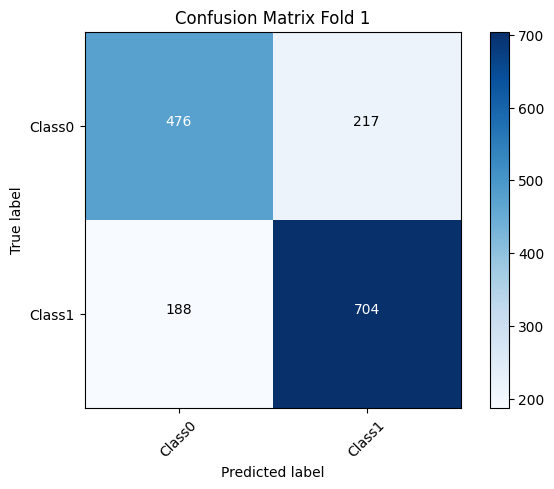


Fold 2
Accuracy: 0.7470031545741325
Precision: 0.74431010665852
Recall: 0.7380418535127056
F1 Score: 0.7400071585621517
Confusion Matrix:
[[462 231]
 [170 722]]


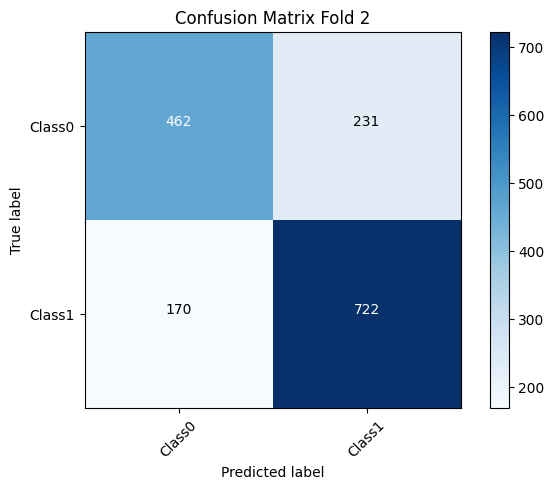


Fold 3
Accuracy: 0.7533123028391168
Precision: 0.7494886911467278
Recall: 0.7485655465962863
F1 Score: 0.7489895547155261
Confusion Matrix:
[[493 201]
 [190 701]]


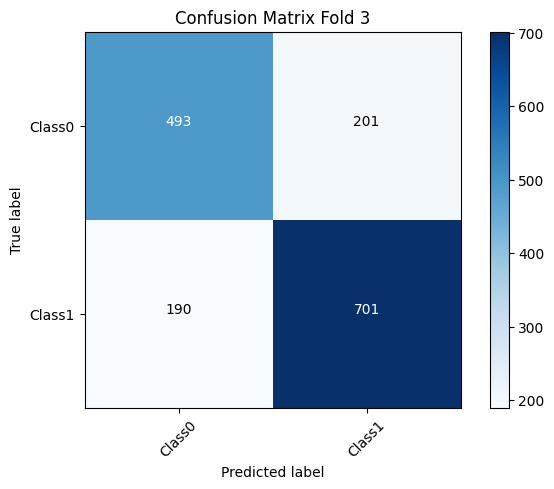


Fold 4
Accuracy: 0.7481060606060606
Precision: 0.7459134615384615
Recall: 0.7385762385762386
F1 Score: 0.7407397835806293
Confusion Matrix:
[[459 234]
 [165 726]]


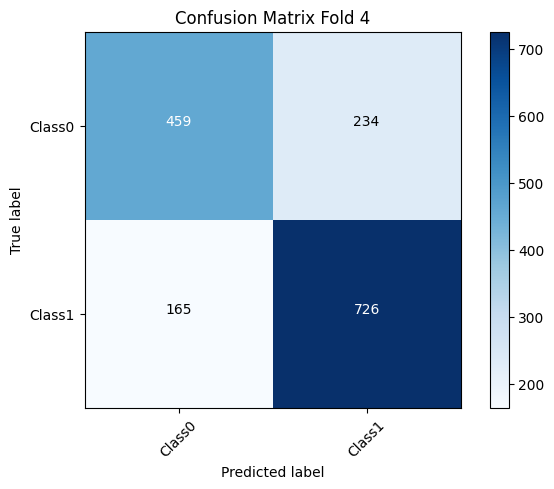


Fold 5
Accuracy: 0.7481060606060606
Precision: 0.7441402714932126
Recall: 0.744668911335578
F1 Score: 0.7443895534008068
Confusion Matrix:
[[497 196]
 [203 688]]


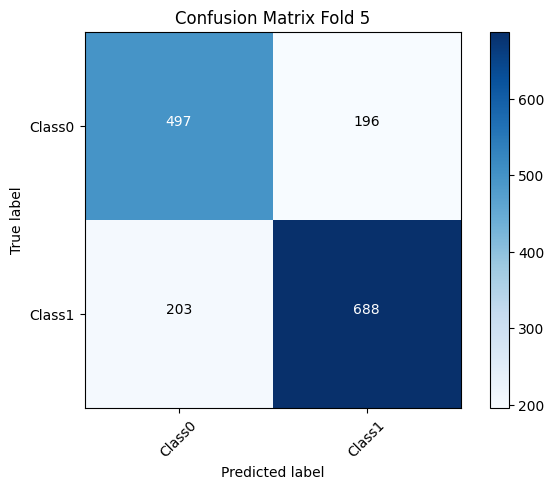


Mean Metrics Across All Folds:
Mean Accuracy: 0.7482014147787018
Mean Precision: 0.7448959067926869
Mean Recall: 0.7415811455071738
Mean F1 Score: 0.7426412979879233

Aggregated Confusion Matrix:
[[2387 1079]
 [ 916 3541]]


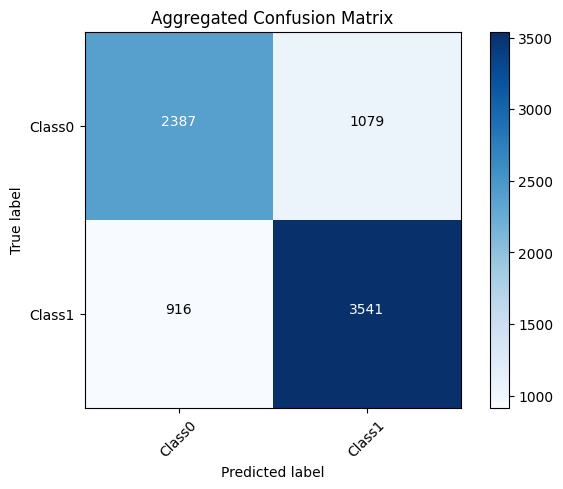

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = svm_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['Class0', 'Class1'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['Class0', 'Class1'], title='Aggregated Confusion Matrix')


# **Char**-Ngrams


Fold 1
Accuracy: 0.7936908517350157
Precision: 0.7906361715957102
Recall: 0.7893403930399446
F1 Score: 0.7899327235122388
Confusion Matrix:
[[523 170]
 [157 735]]


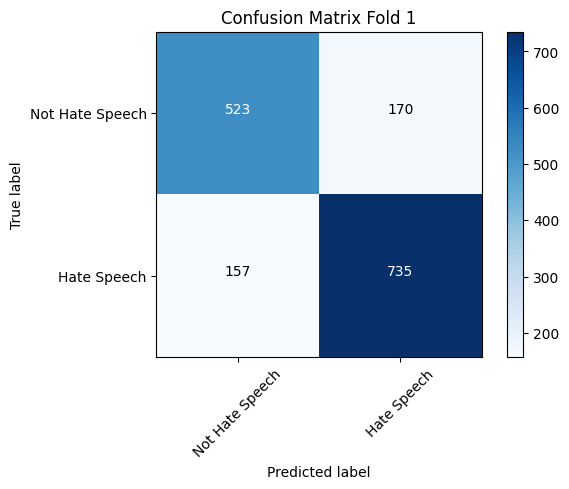


Fold 2
Accuracy: 0.7735015772870663
Precision: 0.7709749074454957
Recall: 0.7664133325568303
F1 Score: 0.7680955111565941
Confusion Matrix:
[[492 201]
 [158 734]]


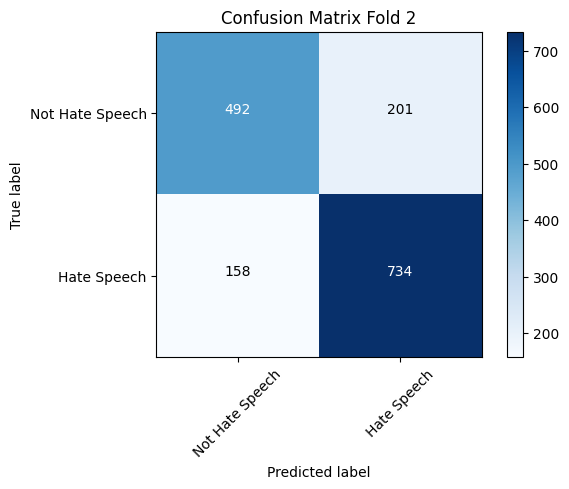


Fold 3
Accuracy: 0.7690851735015772
Precision: 0.7667113423476
Recall: 0.7616389640885318
F1 Score: 0.7634328358208955
Confusion Matrix:
[[487 207]
 [159 732]]


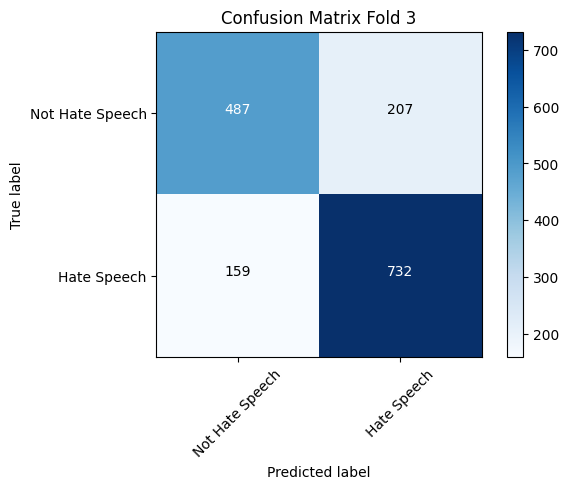


Fold 4
Accuracy: 0.7714646464646465
Precision: 0.7710337536811901
Recall: 0.7615840949174282
F1 Score: 0.7643089671500443
Confusion Matrix:
[[473 220]
 [142 749]]


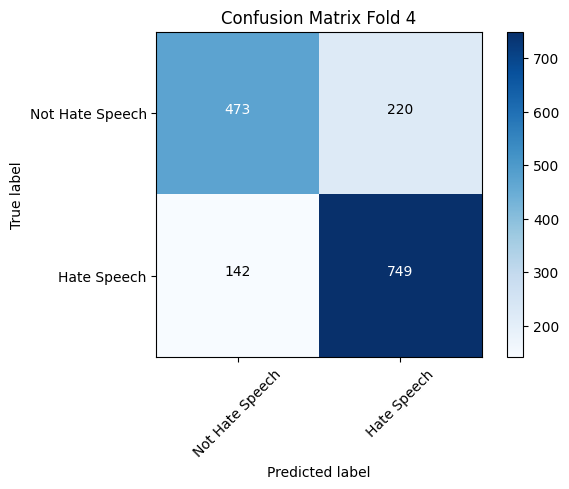


Fold 5
Accuracy: 0.7619949494949495
Precision: 0.758596832126244
Recall: 0.7560525893859227
F1 Score: 0.7570938537628268
Confusion Matrix:
[[491 202]
 [175 716]]


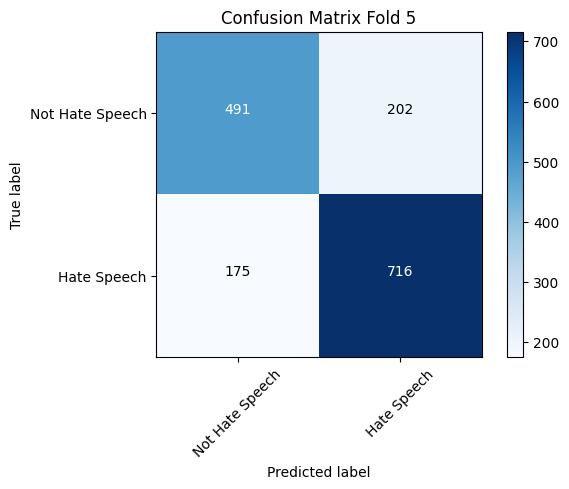


Mean Metrics Across All Folds:
Mean Accuracy: 0.773947439696651
Mean Precision: 0.7715906014392478
Mean Recall: 0.7670058747977315
Mean F1 Score: 0.76857277828052

Aggregated Confusion Matrix:
[[2466 1000]
 [ 791 3666]]


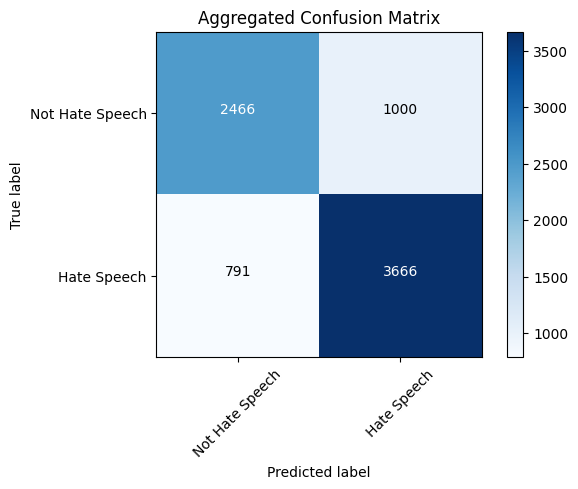

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.zeros((2, 2), dtype=int)

# Initialize a TF-IDF vectorizer for character n-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(1, 5))

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = svm_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Compute and aggregate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['Not Hate Speech', 'Hate Speech'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['Not Hate Speech', 'Hate Speech'], title='Aggregated Confusion Matrix')


# **word /chrgram**


Fold 1
Accuracy: 0.7886435331230284
Precision: 0.7853607993332403
Recall: 0.7846951255023005
F1 Score: 0.7850119990007244
Confusion Matrix:
[[522 171]
 [164 728]]


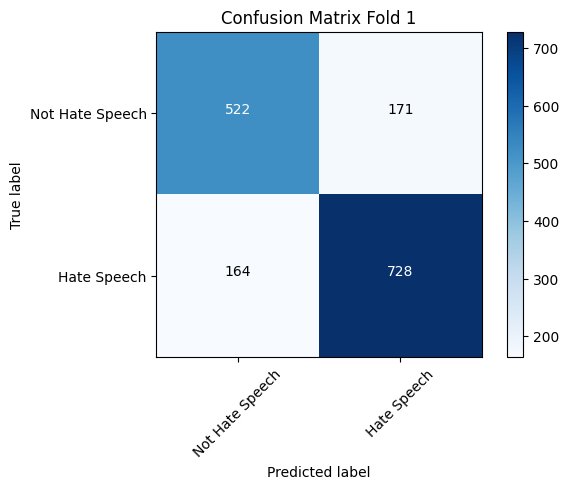


Fold 2
Accuracy: 0.7817034700315457
Precision: 0.7794021386961913
Recall: 0.7748270663068869
F1 Score: 0.7765371551139624
Confusion Matrix:
[[499 194]
 [152 740]]


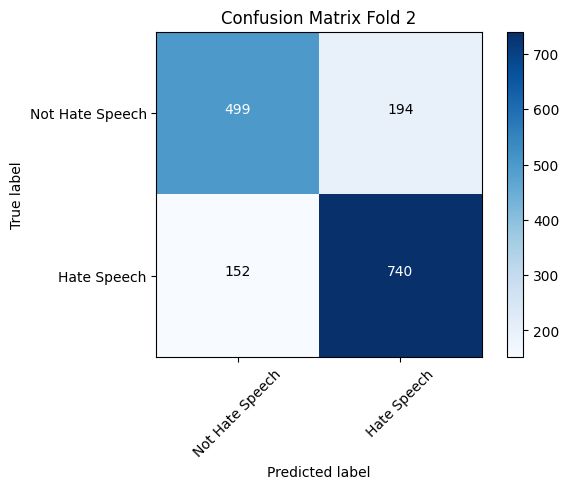


Fold 3
Accuracy: 0.7602523659305994
Precision: 0.7565755075132419
Recall: 0.755534855438794
F1 Score: 0.7560100204817091
Confusion Matrix:
[[498 196]
 [184 707]]


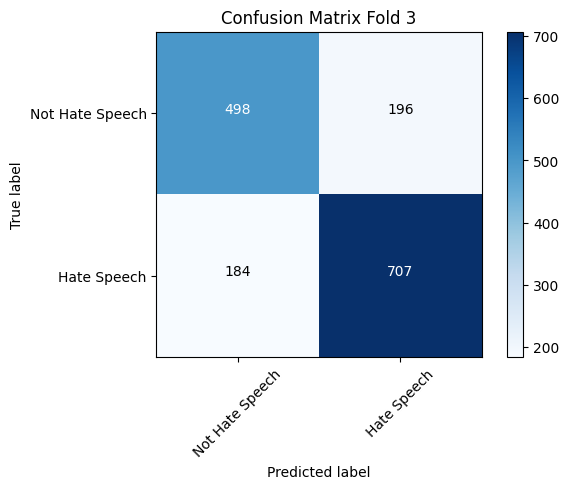


Fold 4
Accuracy: 0.7733585858585859
Precision: 0.7717034700315457
Recall: 0.765031265031265
F1 Score: 0.767231121318932
Confusion Matrix:
[[484 209]
 [150 741]]


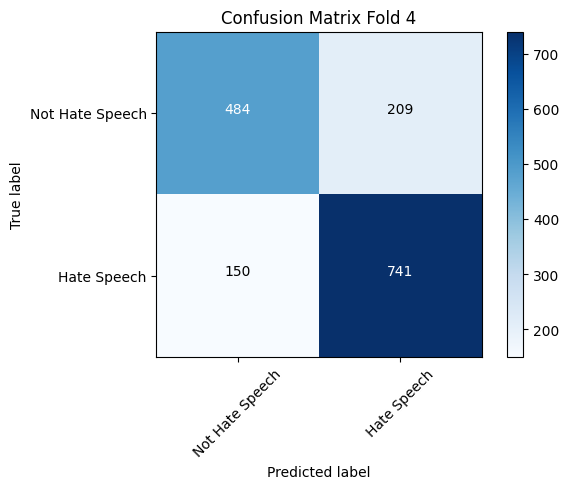


Fold 5
Accuracy: 0.7638888888888888
Precision: 0.7601779888039301
Recall: 0.7612634279300946
F1 Score: 0.7606593406593407
Confusion Matrix:
[[513 180]
 [194 697]]


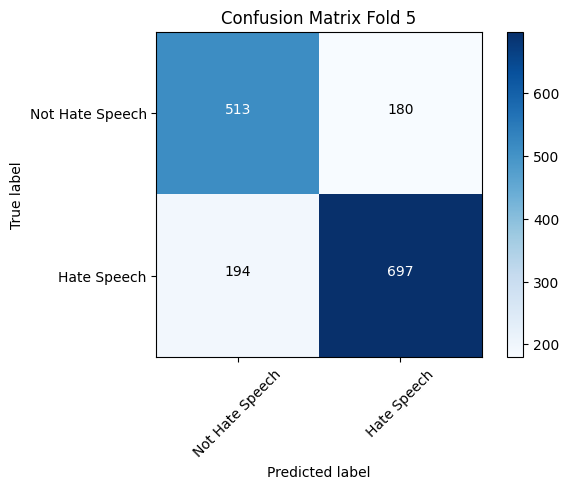


Mean Metrics Across All Folds:
Mean Accuracy: 0.7735693687665296
Mean Precision: 0.7706439808756299
Mean Recall: 0.7682703480418682
Mean F1 Score: 0.7690899273149336

Aggregated Confusion Matrix:
[[2516  950]
 [ 844 3613]]


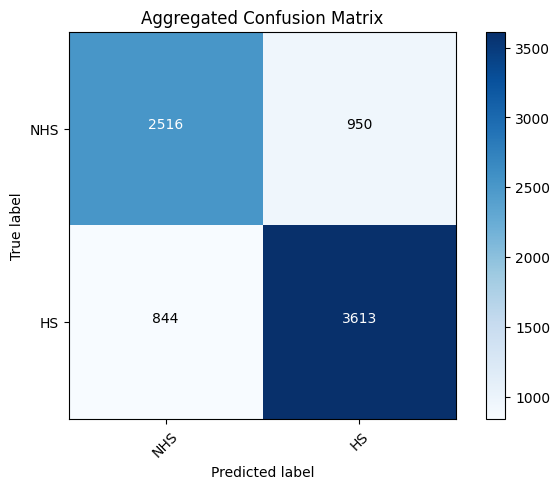

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import hstack  # To combine sparse matrices

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')  # Adjust the path to your dataset

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.zeros((2, 2), dtype=int)

# Initialize TF-IDF vectorizers for word and character n-grams
word_tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
char_tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))

# Vectorize the text data using both word and character n-grams
X_word_tfidf = word_tfidf_vectorizer.fit_transform(tweets)
X_char_tfidf = char_tfidf_vectorizer.fit_transform(tweets)
X_tfidf_combined = hstack([X_word_tfidf, X_char_tfidf])  # Combine word and char features

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train, X_val = X_tfidf_combined[train_idx], X_tfidf_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = svm_model.predict(X_val)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Compute and aggregate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['Not Hate Speech', 'Hate Speech'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


# **هامش**


Fold 1
Accuracy: 0.783596214511041
Precision: 0.7801902660029556
Recall: 0.7797279327548385
F1 Score: 0.7799510161259835

Fold 2
Accuracy: 0.771608832807571
Precision: 0.7692520204519215
Recall: 0.7640878677874193
F1 Score: 0.7659243412249268

Fold 3
Accuracy: 0.7697160883280757
Precision: 0.7660981327297712
Recall: 0.76618247799804
F1 Score: 0.7661399889805559

Fold 4
Accuracy: 0.7708333333333334
Precision: 0.7683404558404558
Recall: 0.7635882635882636
F1 Score: 0.7653100582977926

Fold 5
Accuracy: 0.7632575757575758
Precision: 0.7595690849904921
Recall: 0.7608625941959275
F1 Score: 0.7601255100866415

Mean Metrics Across All Folds:
Mean Accuracy: 0.7718024089475194
Mean Precision: 0.7686899920031193
Mean Recall: 0.7668898272648977
Mean F1 Score: 0.7674901829431802

Aggregated Confusion Matrix:
[[2522.  944.]
 [ 864. 3593.]]


<function __main__.plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7e2af2373670>)>

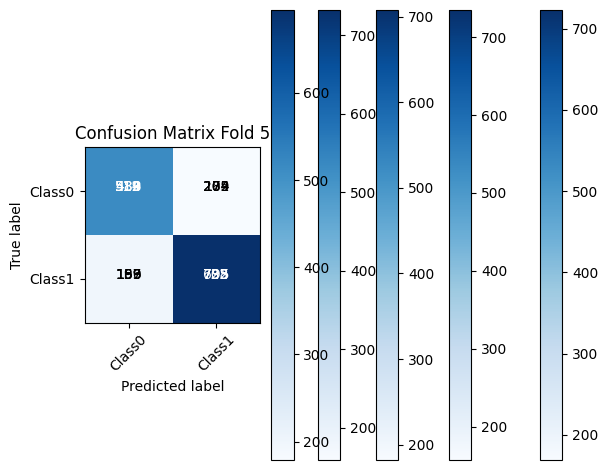

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import hstack  # To combine sparse matrices
import matplotlib.pyplot as plt
import itertools

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load data
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')  # Update this path

labels = df[' class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize TF-IDF vectorizers
word_tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
char_tfidf_vectorizer = TfidfVectorizer(max_features=20000, analyzer='char', ngram_range=(2, 6))

# Vectorize the text data
X_word_tfidf = word_tfidf_vectorizer.fit_transform(tweets)
X_char_tfidf = char_tfidf_vectorizer.fit_transform(tweets)
X_tfidf_combined = hstack([X_word_tfidf, X_char_tfidf])

# Initialize a variable to store the aggregated confusion matrix
aggregate_cm = np.zeros((2, 2))

# Initialize lists to store metrics for all folds
all_accuracies, all_precisions, all_recalls, all_f1_scores = [], [], [], []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf_combined, labels)):
    print(f'\nFold {fold + 1}')

    X_train, X_val = X_tfidf_combined[train_idx], X_tfidf_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = svm_model.predict(X_val)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and aggregate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    plot_confusion_matrix(cm, classes=['Class0', 'Class1'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(all_accuracies)
mean_precision = np.mean(all_precisions)
mean_recall = np.mean(all_recalls)
mean_f1_score = np.mean(all_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix


Fold 1
Metrics for fold 1: {'accuracy': 0.7817034700315457, 'f1': 0.7780629506243586, 'precision': 0.7782508617561683, 'recall': 0.7778853558001539}


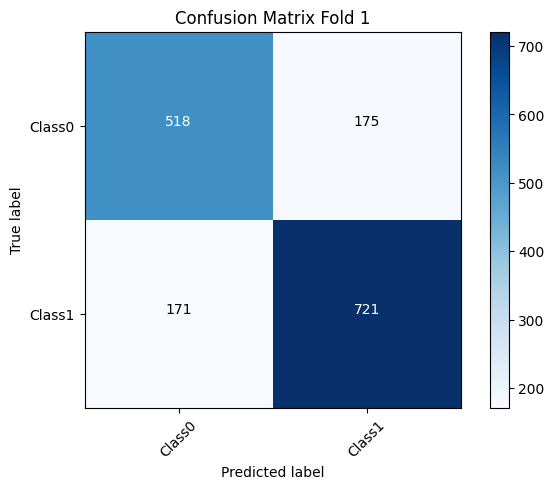

Fold 2
Metrics for fold 2: {'accuracy': 0.7735015772870663, 'f1': 0.7676276717519064, 'precision': 0.771474041005291, 'recall': 0.7656085195322864}


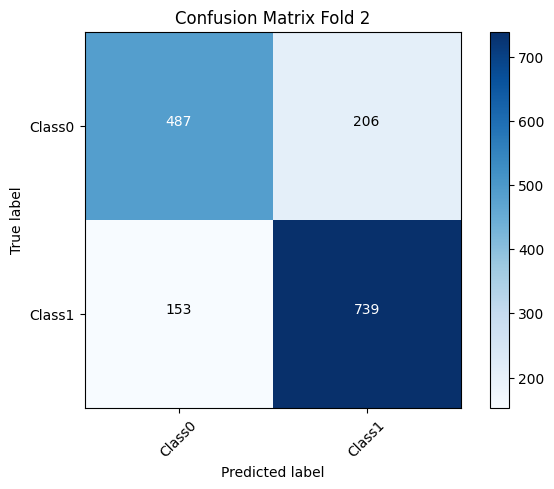

Fold 3
Metrics for fold 3: {'accuracy': 0.7659305993690851, 'f1': 0.7621434133220075, 'precision': 0.7622734939798042, 'recall': 0.7620190052947018}


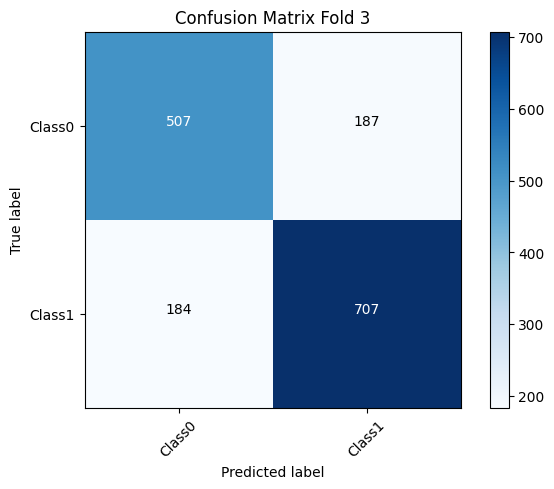

Fold 4
Metrics for fold 4: {'accuracy': 0.7765151515151515, 'f1': 0.771264097744361, 'precision': 0.7740750070383926, 'recall': 0.7696007696007696}


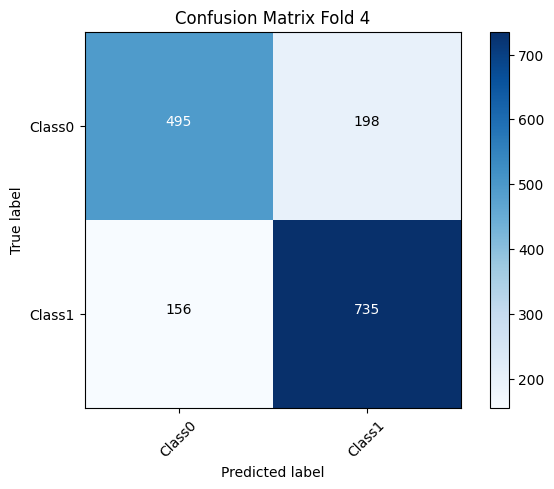

Fold 5
Metrics for fold 5: {'accuracy': 0.7670454545454546, 'f1': 0.7642331352931899, 'precision': 0.7635062111201889, 'recall': 0.7653519320185986}


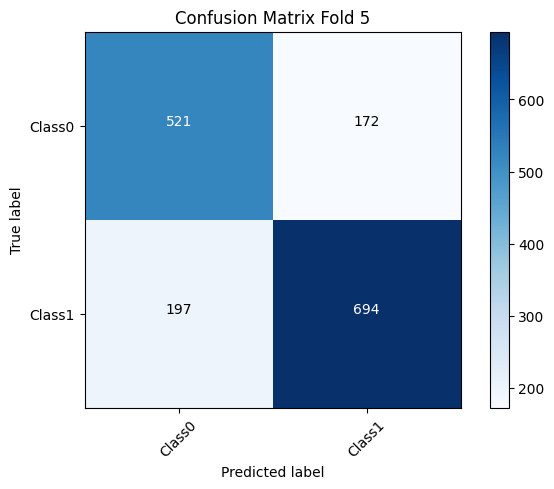

Mean accuracy across all folds: 0.7729


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import hstack  # To combine sparse matrices
import matplotlib.pyplot as plt
import itertools

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load data
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

labels = df[' class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize TF-IDF vectorizers
word_tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
char_tfidf_vectorizer = TfidfVectorizer(max_features=20000, analyzer='char', ngram_range=(2, 6))

# Vectorize the text data outside the loop
X_word_tfidf = word_tfidf_vectorizer.fit_transform(tweets)
X_char_tfidf = char_tfidf_vectorizer.fit_transform(tweets)
X_tfidf_combined = hstack([X_word_tfidf, X_char_tfidf])  # Combine word and char features

# Loop through the folds
fold_accuracies = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf_combined, labels)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_tfidf_combined[train_idx], X_tfidf_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train, y_train)

    # Predict and compute metrics
    y_pred = svm_model.predict(X_val)
    metrics = compute_metrics(y_val, y_pred)
    fold_accuracies.append(metrics['accuracy'])
    print(f"Metrics for fold {fold + 1}: {metrics}")

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cm, classes=['Class0', 'Class1'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate mean accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean accuracy across all folds: {mean_accuracy:.4f}')


<ipython-input-8-aeb1be69ab5f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-8-aeb1be69ab5f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-8-aeb1be69ab5f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-8-aeb1be69ab5f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-8-aeb1be69ab5f>:24: Futur

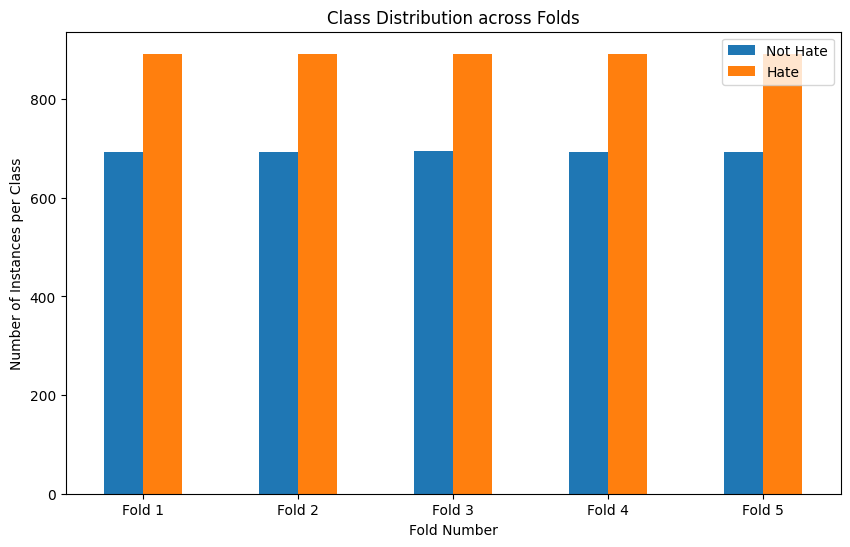

     Fold Not Hate Hate
0  Fold 1      693  892
1  Fold 2      693  892
2  Fold 3      694  891
3  Fold 4      693  891
4  Fold 5      693  891


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the uploaded file
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

# Extract labels and tweets
labels = df[' class'].values
tweets = df['Tweet'].values

# Initialize the Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to hold fold number and class counts
fold_distribution = pd.DataFrame(columns=['Fold', 'Not Hate', 'Hate'])

# Loop through the folds in Stratified K-Fold
for fold, (train_idx, test_idx) in enumerate(skf.split(tweets, labels), 1):
    # Count the labels in this fold
    (unique, counts) = np.unique(labels[test_idx], return_counts=True)
    counts = dict(zip(unique, counts))
    fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
                                                 'Not Hate': counts.get(0, 0),
                                                 'Hate': counts.get(1, 0)},
                                                ignore_index=True)

# Plotting the distribution of classes in each fold as a bar chart
fold_distribution.plot(x='Fold',
                       y=['Not Hate', 'Hate'],
                       kind='bar',
                       stacked=False,
                       figsize=(10, 6),
                       title='Distribution of Classes in Each Fold')

# Adding labels and titles to the plot
plt.xlabel('Fold Number')
plt.ylabel('Number of Instances per Class')
plt.title('Class Distribution across Folds')
plt.xticks(rotation=0)  # Keeping the x-axis labels horizontal for readability
plt.show()

# Print the numerical distribution of the classes in each fold
print(fold_distribution)


Number of NaN values in each column:
Tweet        0
 class       0
Sub       3466
dtype: int64


<ipython-input-20-a1b0e65e1121>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-20-a1b0e65e1121>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-20-a1b0e65e1121>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-20-a1b0e65e1121>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-20-a1b0e65e1121>:31: 

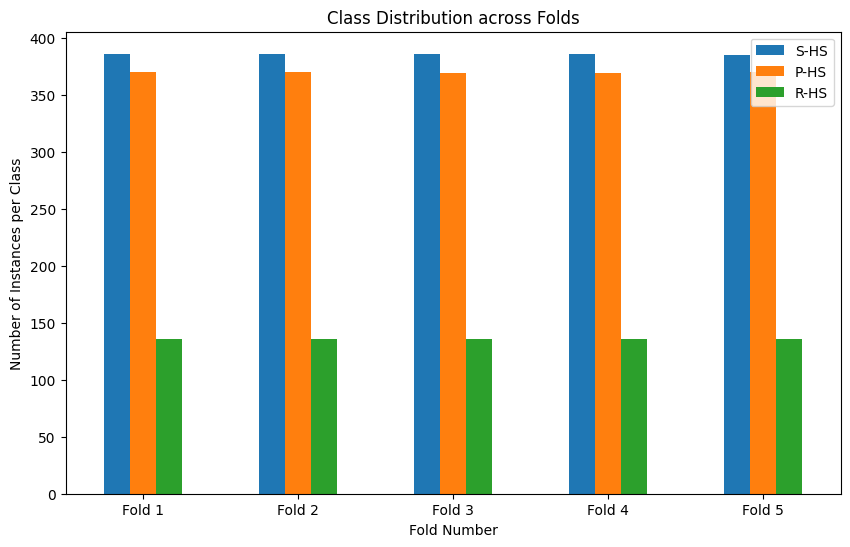

     Fold S-HS P-HS R-HS
0  Fold 1  386  370  136
1  Fold 2  386  370  136
2  Fold 3  386  369  136
3  Fold 4  386  369  136
4  Fold 5  385  370  136


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the uploaded file
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

# Check for NaN values in the DataFrame
print("Number of NaN values in each column:")
print(df.isnull().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Extract labels and tweets after removing NaN values
labels = df['Sub'].values
tweets = df['Tweet'].values

# Initialize the Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to hold fold number and class counts
fold_distribution = pd.DataFrame(columns=['Fold', 'S-HS', 'P-HS', 'R-HS'])  # Adjust column names

# Loop through the folds in Stratified K-Fold
for fold, (train_idx, test_idx) in enumerate(skf.split(tweets, labels), 1):
    # Count the labels in this fold
    (unique, counts) = np.unique(labels[test_idx], return_counts=True)
    counts = dict(zip(unique, counts))
    fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
                                                 'S-HS': counts.get('S-HS', 0),  # Adjust label names
                                                 'P-HS': counts.get('P-HS', 0),
                                                 'R-HS': counts.get('R-HS', 0)},
                                                ignore_index=True)

# Plotting the distribution of classes in each fold as a bar chart
fold_distribution.plot(x='Fold',
                       y=['S-HS', 'P-HS', 'R-HS'],  # Adjust label names
                       kind='bar',
                       stacked=False,
                       figsize=(10, 6),
                       title='Distribution of Classes in Each Fold')

# Adding labels and titles to the plot
plt.xlabel('Fold Number')
plt.ylabel('Number of Instances per Class')
plt.title('Class Distribution across Folds')
plt.xticks(rotation=0)  # Keeping the x-axis labels horizontal for readability
plt.show()

# Print the numerical distribution of the classes in each fold
print(fold_distribution)


Number of NaN values in each column:
Tweet        0
 class       0
Sub       3466
dtype: int64


<ipython-input-25-755e40a22da3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-25-755e40a22da3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-25-755e40a22da3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-25-755e40a22da3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
<ipython-input-25-755e40a22da3>:34: 

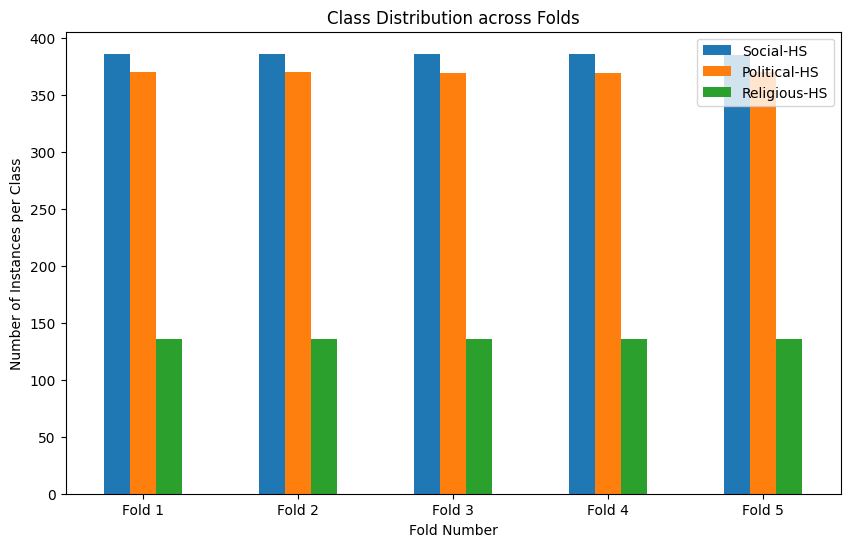

     Fold Social-HS Political-HS Religious-HS
0  Fold 1       386          370          136
1  Fold 2       386          370          136
2  Fold 3       386          369          136
3  Fold 4       386          369          136
4  Fold 5       385          370          136


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the uploaded file
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

# Check for NaN values in the DataFrame
print("Number of NaN values in each column:")
print(df.isnull().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Extract labels and tweets after removing NaN values
labels = df['Sub'].values
tweets = df['Tweet'].values

# Initialize the Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a DataFrame to hold fold number and class counts
fold_distribution = pd.DataFrame(columns=['Fold', 'Social-HS', 'Political-HS', 'Religious-HS'])  # Adjust column names

# Dictionary to map actual labels to desired names
label_map = {'S-HS': 'Social-HS', 'P-HS': 'Political-HS', 'R-HS': 'Religious-HS'}

# Loop through the folds in Stratified K-Fold
for fold, (train_idx, test_idx) in enumerate(skf.split(tweets, labels), 1):
    # Count the labels in this fold
    (unique, counts) = np.unique(labels[test_idx], return_counts=True)
    counts = {label_map.get(label, label): count for label, count in zip(unique, counts)}
    fold_distribution = fold_distribution.append({'Fold': f'Fold {fold}',
                                                 'Social-HS': counts.get('Social-HS', 0),  # Adjust label names
                                                 'Political-HS': counts.get('Political-HS', 0),
                                                 'Religious-HS': counts.get('Religious-HS', 0)},
                                                ignore_index=True)

# Plotting the distribution of classes in each fold as a bar chart
fold_distribution.plot(x='Fold',
                       y=['Social-HS', 'Political-HS', 'Religious-HS'],  # Adjust label names
                       kind='bar',
                       stacked=False,
                       figsize=(10, 6),
                       title='Distribution of Classes in Each Fold')

# Adding labels and titles to the plot
plt.xlabel('Fold Number')
plt.ylabel('Number of Instances per Class')
plt.title('Class Distribution across Folds')
plt.xticks(rotation=0)  # Keeping the x-axis labels horizontal for readability
plt.show()

# Print the numerical distribution of the classes in each fold
print(fold_distribution)


In [ ]:
df

,Tweet,class,Sub
0,كتبك هي من تسب الآخرين و تصفهم بأقذر الألقاب م...,1,R-HS
1,اخونجي متطرف يعشق الفتنه والخراب لغيره وعشان ك...,1,S-HS
2,احسنت هذا عباله كل واحد عايش في لندن خائن,0,NaN
3,الطيور على أشكالها تقع ، الطغاة يحتفلون بوتين ...,1,P-HS
4,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS
...,...,...,...
7918,قاعد اشوف امامي سيناريو الاهلي رئيس غبي وله جم...,1,S-HS
7919,كسم أمير قطر المتناك وامه العاهره موزة وأبوه ا...,1,P-HS
7920,مهما كنت عنصري تذكر أن العرب الخليج هم أكثر نا...,1,S-HS
7921,أستغفر الله العظيم الذي لا إله إلا هو الحي الق...,0,NaN


In [ ]:
print(df.columns)

Index(['Tweet', ' class', 'Sub'], dtype='object')


Fold 1
Metrics for fold 1: {'accuracy': 0.7173501577287066, 'f1': 0.7069205191957815, 'precision': 0.715183525539901, 'recall': 0.7047751700218068}


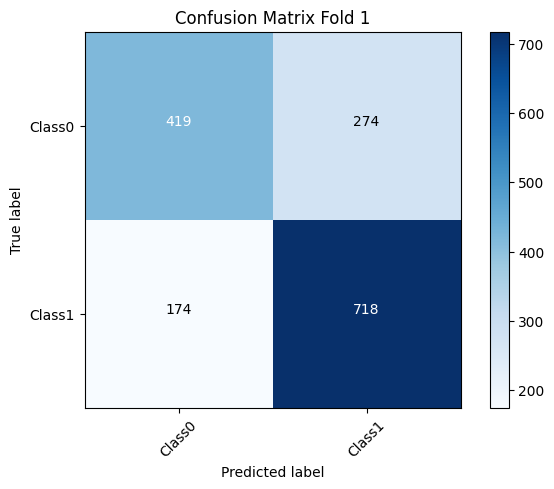

Fold 2
Metrics for fold 2: {'accuracy': 0.726813880126183, 'f1': 0.7153561796042556, 'precision': 0.7267419017979921, 'recall': 0.7128613165608682}


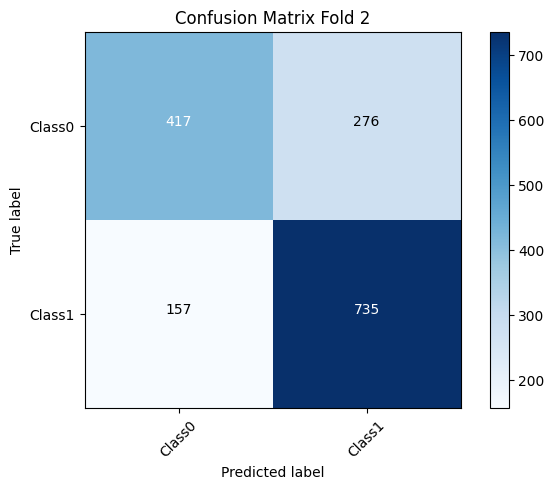

Fold 3
Metrics for fold 3: {'accuracy': 0.7375394321766562, 'f1': 0.7277199102750881, 'precision': 0.7371433438378332, 'recall': 0.7251380277316877}


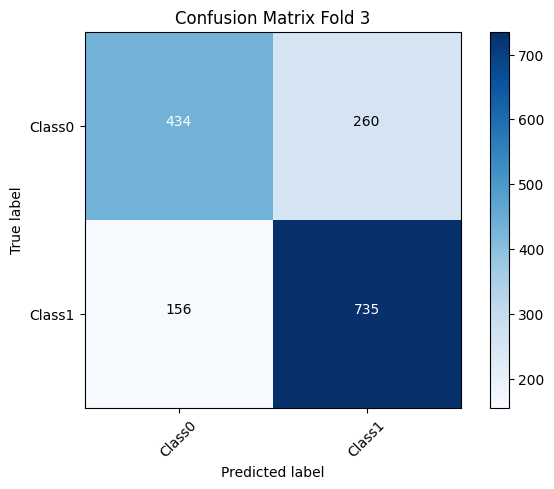

Fold 4
Metrics for fold 4: {'accuracy': 0.7228535353535354, 'f1': 0.710358357474441, 'precision': 0.7235568385205201, 'recall': 0.7079525412858747}


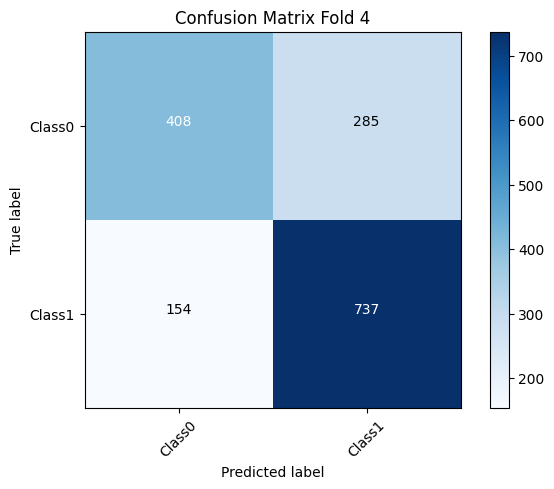

Fold 5
Metrics for fold 5: {'accuracy': 0.7424242424242424, 'f1': 0.7348336145266433, 'precision': 0.7400163353114984, 'recall': 0.7327240660573994}


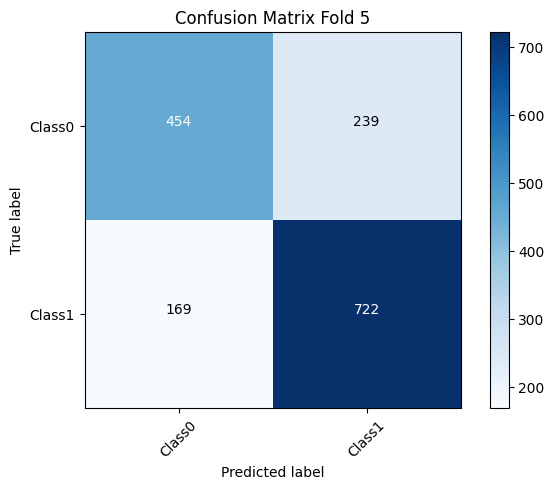

Mean accuracy across all folds: 0.7294


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import itertools

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
# Make sure to replace 'path_to_your_data.csv' with the actual path to your dataset
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df[' class'].values
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store accuracies from each fold
fold_accuracies = []

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Determine the number of top features to select
k_best = 1000

# Initialize SelectKBest with the chi-squared test
feature_selector = SelectKBest(chi2, k=k_best)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'Fold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Perform feature selection on the training data
    X_train_selected = feature_selector.fit_transform(X_train_tfidf, y_train)

    # Transform the validation set with the selected features
    X_val_selected = feature_selector.transform(X_val_tfidf)

    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train_selected, y_train)

    # Predict on the validation set with selected features
    y_pred = svm_model.predict(X_val_selected)

    # Compute and print the evaluation metrics
    metrics = compute_metrics(y_val, y_pred)
    fold_accuracies.append(metrics['accuracy'])
    print(f"Metrics for fold {fold + 1}: {metrics}")

    # Compute confusion matrix and plot
    cm = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cm, classes=['Class0', 'Class1'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean accuracy across all folds: {mean_accuracy:.4f}')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification  # To generate a synthetic dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the base classifier
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Apply RFE with the base estimator
rfe = RFE(estimator=base_estimator, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Step 5: Transform the training and testing sets to the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Step 6: Train a new model on the reduced set of features
base_estimator.fit(X_train_rfe, y_train)

# Step 7: Make predictions on the test set and evaluate the model
y_pred = base_estimator.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with RFE selected features: {accuracy:.4f}")

# Step 8: Inspect the selected features (in this example, we use feature indices)
selected_features_indices = np.where(rfe.support_)[0]
print(f"Indices of selected features: {selected_features_indices}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

X = df['Tweet']
y = df[' class']  # Adjust the column name if necessary

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Vectorize the text data
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Initialize the base model for feature selection
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature Selection
selector = SelectFromModel(base_model, threshold="median")  # Selecting features with importance greater than the median
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a new model on the reduced set of features
base_model.fit(X_train_selected, y_train)

# Make predictions on the test set and evaluate the model
y_pred = base_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.4f}")

# Optional: Inspect the selected features
selected_features_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_features_indices}")


Model accuracy with selected features: 0.7198
Indices of selected features: [   2    3    4 ... 9995 9996 9998]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC  # Using LinearSVC for linear SVM
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming the dataset is loaded into DataFrame 'df'
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

X = df['Tweet']
y = df[' class']  # Adjust the column name if necessary

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Vectorize the text data
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Initialize the base model (linear SVM) for feature selection
base_model = LinearSVC(random_state=42)

# Feature Selection
selector = SelectFromModel(base_model, threshold="mean")  # Selecting features with coefficients greater than the mean
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a new model on the reduced set of features
base_model.fit(X_train_selected, y_train)

# Make predictions on the test set and evaluate the model
y_pred = base_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.4f}")

# Optional: Inspect the selected features
selected_features_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_features_indices}")


Model accuracy with selected features: 0.7434
Indices of selected features: [   2    3   13 ... 9992 9995 9997]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from scipy.sparse import csr_matrix

# Sample data
data = {
    'Tweet': ['Hate speech is not good', 'Love is all we need', 'Hate leads to suffering'],
    'class': ['Hate', 'Not Hate', 'Hate']
}
df = pd.DataFrame(data)

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Including both unigrams and bigrams

# Apply TF-IDF transformation to the 'Tweet' text data
X_tfidf = vectorizer.fit_transform(df['Tweet'])

# X_tfidf is a sparse matrix of TF-IDF features
print("Sparse Matrix Representation (TF-IDF):")
print(X_tfidf)

# Converting to a dense matrix to visualize the non-zero values
dense_matrix = X_tfidf.todense()
print("\nDense Matrix Representation (for visualization):")
print(dense_matrix)

# Example of accessing the sparse matrix elements
# csr_matrix (Compressed Sparse Row matrix) provides efficient row slicing
if isinstance(X_tfidf, csr_matrix):
    # Accessing the first row of the sparse matrix
    first_row = X_tfidf[0].toarray()
    print("\nFirst row in dense format (for visualization):")
    print(first_row)


Sparse Matrix Representation (TF-IDF):
  (0, 15)	0.3501387057719138
  (0, 8)	0.3501387057719138
  (0, 17)	0.3501387057719138
  (0, 5)	0.3501387057719138
  (0, 2)	0.3501387057719138
  (0, 14)	0.3501387057719138
  (0, 6)	0.2662895107233706
  (0, 16)	0.3501387057719138
  (0, 3)	0.2662895107233706
  (1, 22)	0.3414262179382391
  (1, 1)	0.3414262179382391
  (1, 7)	0.3414262179382391
  (1, 12)	0.3414262179382391
  (1, 13)	0.3414262179382391
  (1, 21)	0.3414262179382391
  (1, 0)	0.3414262179382391
  (1, 11)	0.3414262179382391
  (1, 6)	0.2596634391575384
  (2, 20)	0.3898880096169543
  (2, 10)	0.3898880096169543
  (2, 4)	0.3898880096169543
  (2, 18)	0.3898880096169543
  (2, 19)	0.3898880096169543
  (2, 9)	0.3898880096169543
  (2, 3)	0.29651988085384556

Dense Matrix Representation (for visualization):
[[0.         0.         0.35013871 0.26628951 0.         0.35013871
  0.26628951 0.         0.35013871 0.         0.         0.
  0.         0.         0.35013871 0.35013871 0.35013871 0.35013871
 

In [ ]:
precision = 0.7601779888039301
recall = 0.7612634279300946

# Calculating the F1 score using the harmonic mean of precision and recall
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.7607203211756016